Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
   Given two matrices:  
Matrix $A$ of dimension $(n \times k)$  
Matrix $B$ of dimension $(k \times m)$  

Multiplying $A$ and $B$ gives a matrix $C$ of dimension $(n \times m)$.

For a single element $c_{ij}$ of $C$:  
$$
c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + a_{ik}b_{kj}
$$
Here, we have:
- $k$ multiplications  
- $(k-1)$ additions

For the first column (with $n$ elements):  
- Multiplications: $n \times k$  
- Additions: $n \times (k - 1)$

For all $m$ columns:  
- Multiplications: $m \times n \times k$  
- Additions: $m \times n \times (k - 1)$

Final answer:  
$$
\text{Multiplications} = k \times n \times m
$$
$$
\text{Additions} = (k - 1) \times n \times m
$$


Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions.  Which one is faster? Why?

In [13]:
import time
import random
import numpy as np

n, k, m = 3, 4, 5

A = [[random.random() for _ in range(k)] for _ in range(n)]
B = [[random.random() for _ in range(m)] for _ in range(k)]

start_time = time.time()

C = [[0 for _ in range(m)] for _ in range(n)]

for i in range(n):
    for j in range(m):
        for t in range(k):
            C[i][j] += A[i][t] * B[t][j]

cal1_time = time.time() - start_time
print(f"list of lists time: {cal1_time:.6f} seconds")

A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
cal2_time = time.time() - start_time
print(f"NumPy time: {cal2_time:.6f} seconds")

if cal2_time < cal1_time:
    print("Numpy is faster")
else:
    print("list of lists is faster")


list of lists time: 0.000143 seconds
NumPy time: 0.000067 seconds
Numpy is faster


Q4 What is the gradient of the following function with respect to x and y?
$$
x^{2}y + y^{3} \sin(x)
$$


$$
\textbf{Given:} \quad f(x, y) = x^2 y + y^3 \sin(x)
$$

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

$$
\textbf{Gradient:} \quad \nabla f(x, y) = \left( 2xy + y^3 \cos(x), \; x^2 + 3y^2 \sin(x) \right)
$$

$$
\text{At } (1,2): \quad \nabla f(1, 2) = (8.322, \; 11.097)
$$

$$
\text{At } (-1,-2): \quad \nabla f(-1, -2) = (-0.322, \; -9.097)
$$

$$
\text{At } (1,-2): \quad \nabla f(1, -2) = (-8.322, \; 11.097)
$$

$$
\text{At } (-1, 2): \quad \nabla f(-1, 2) = (0.322, \; -9.097)
$$


Q5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [6]:
from jax import grad
import jax.numpy as jnp

def func(xy):
    x, y = xy
    return (x**2) * y + (y**3) * jnp.sin(x)

grad_func = grad(func)
points = jnp.array([
    [1.0,2.0],
    [-1.0,-2.0],
    [1.0,-2.0],
    [-1.0,2.0]
])
grads = []

for point in points:
    g = grad_func(point)
    grads.append(g)
    
grads = jnp.array(grads)

print("Points:\n", points)
print("\nGradients [df/dx, df/dy]:\n", grads)
# here we can see that values are matching 

Points:
 [[ 1.  2.]
 [-1. -2.]
 [ 1. -2.]
 [-1.  2.]]

Gradients [df/dx, df/dy]:
 [[ 8.322418  11.0976515]
 [-0.3224182 -9.0976515]
 [-8.322418  11.0976515]
 [ 0.3224182 -9.0976515]]


Q6 Use sympy to confirm that you obtain the same gradient analytically.



In [1]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)
#here we can see the output that it is same as it calculated by me.

∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5. 
1. y = x

2. y = x^2

3. y = x^3 / 100

4. y = sin(x)

5. y = sin(x) / x

6. y = log(x)

7. y = exp(x)

In [1]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 537.0 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.9 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 2.1 MB/s eta 0:00:03
   --------------------- ------------------ 4.5/8.1 MB 2.2 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.2 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.2 MB/s eta 0:00:02
   --------------------------- 


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


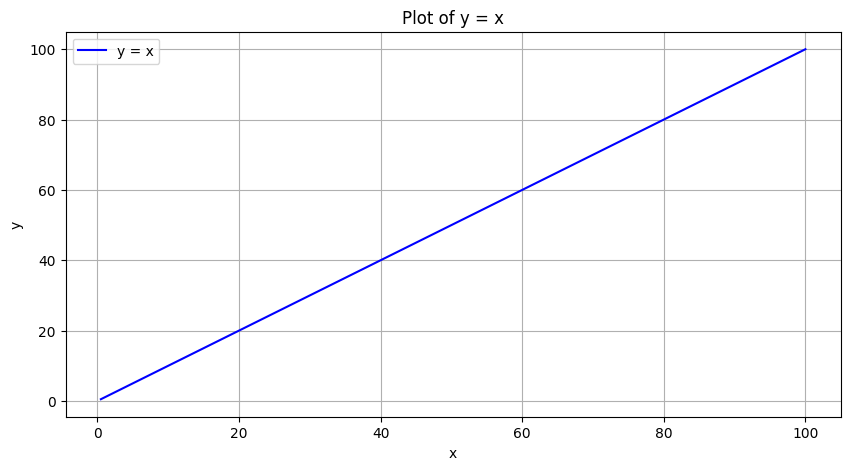

In [4]:
#(i)
import numpy as np
import matplotlib.pyplot as plt

# Define the domain: x from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.5, 0.5)

# y = x
y = x

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = x', color='blue')
plt.title('Plot of y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


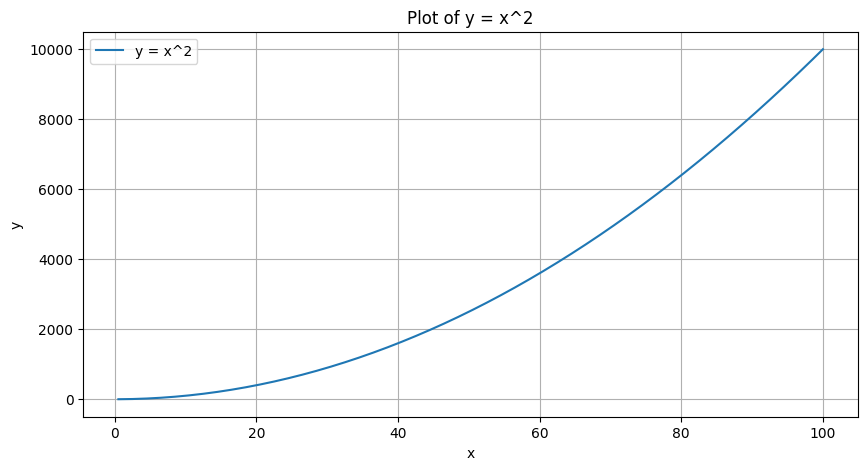

In [6]:
#(2)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y = x**2

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = x^2')
plt.title('Plot of y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


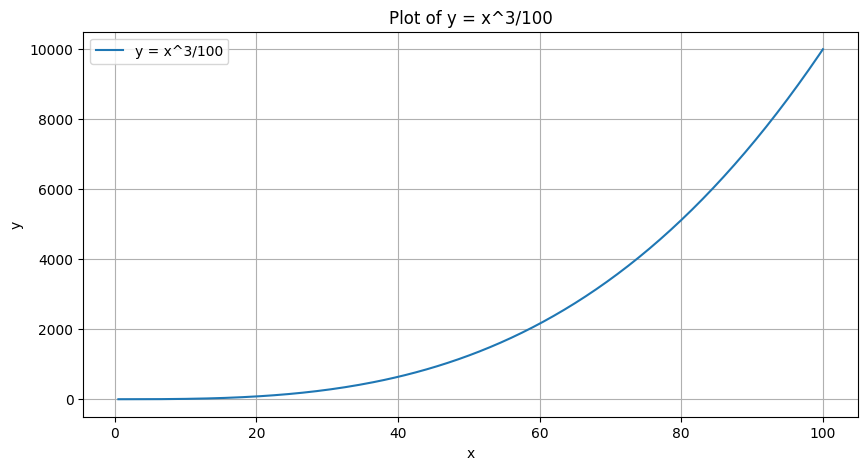

In [7]:
#(3)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y = x**3/100

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = x^3/100')
plt.title('Plot of y = x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


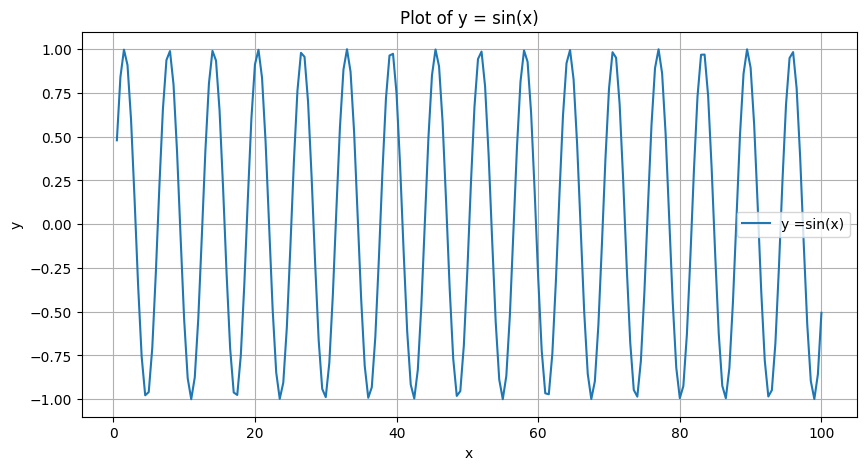

In [8]:
#(4)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y = np.sin(x)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y =sin(x)')
plt.title('Plot of y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


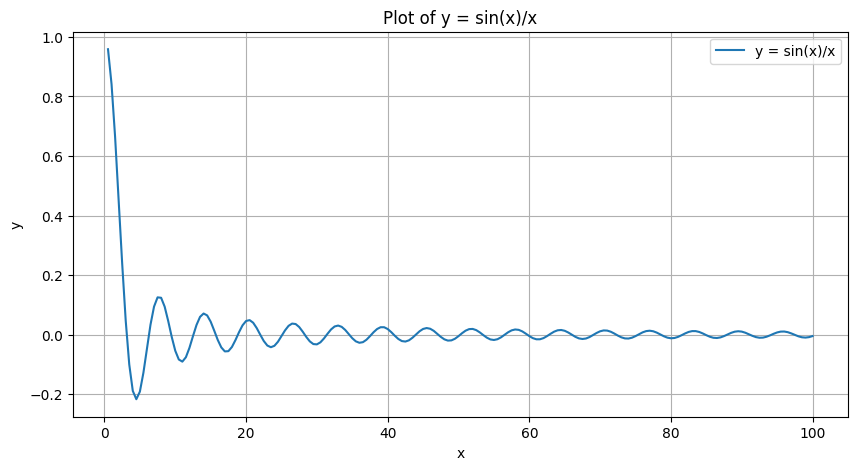

In [9]:
#(5)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y = np.sin(x) / x

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = sin(x)/x')
plt.title('Plot of y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


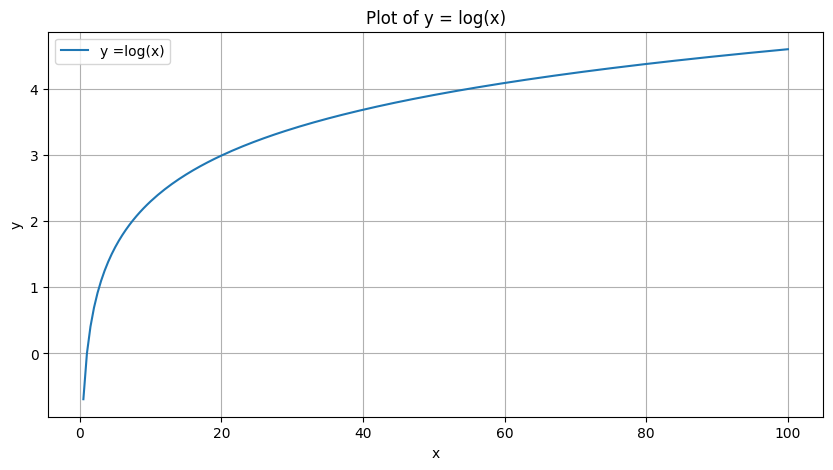

In [10]:
#(6)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y = np.log(x)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y =log(x)')
plt.title('Plot of y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


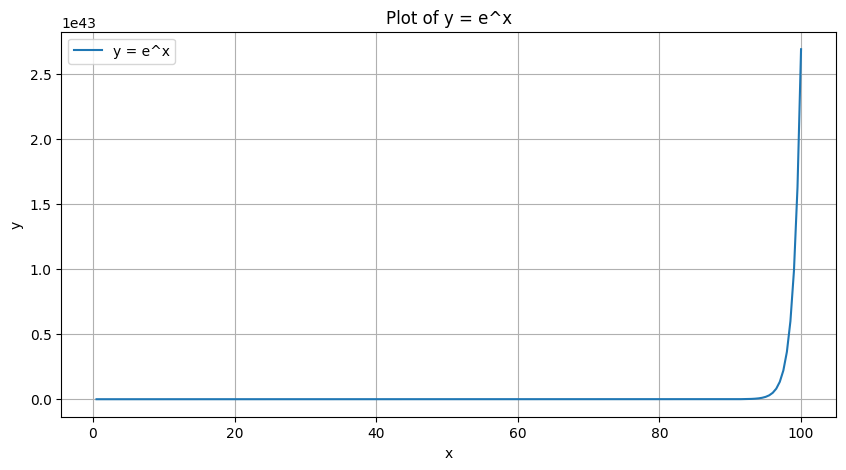

In [11]:
#(7)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y = np.exp(x)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = e^x')
plt.title('Plot of y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


Q 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [13]:
!pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.0 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.0 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.0 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.0 MB 2.7 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.0 MB 3.0 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.9 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.0 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 4.2 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#Q10
import numpy as np
import pandas as pd


matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))

columns = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(matrix, columns=columns)

print("Generated DataFrame:")
print(df)
print("-" * 50)

std_devs = df.std()
highest_std_dev_column = std_devs.idxmax()
print(f"Column with the highest standard deviation: {highest_std_dev_column}")
print(f"Standard deviation values for each column:\n{std_devs}")
print("-" * 50)


row_means = df.mean(axis=1)
lowest_mean_row = row_means.idxmin()
print(f"Row with the lowest mean: {lowest_mean_row}")
print(f"Mean values for each row:\n{row_means}")
print("-" * 50)


Generated DataFrame:
           a         b         c         d         e
0   1.055228  1.307840  1.655921  1.354898  1.503190
1   1.205830  1.571607  1.583032  1.987754  1.310069
2   1.541906  1.420049  1.980359  1.522674  1.465135
3   1.500433  1.706582  1.576014  1.336423  1.474580
4   1.874392  1.461516  1.712344  1.551047  1.540023
5   1.983192  1.502246  1.053818  1.093439  1.317122
6   1.643715  1.328872  1.725357  1.951206  1.014988
7   1.722120  1.510261  1.858659  1.091042  1.602067
8   1.016993  1.798606  1.404434  1.962605  1.078799
9   1.888860  1.908969  1.530474  1.358947  1.702939
10  1.123141  1.216476  1.661622  1.351367  1.287707
11  1.459268  1.423453  1.670657  1.796092  1.297953
12  1.323962  1.665588  1.927139  1.480706  1.124020
13  1.598701  1.452993  1.331942  1.592355  1.442537
14  1.934908  1.244478  1.379566  1.184181  1.451555
15  1.232162  1.639766  1.432878  1.658780  1.949583
16  1.369832  1.384236  1.851350  1.868113  1.697016
17  1.694163  1.424341  1

Q11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [7]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

lt8_count = (df["g"] == "LT8").sum()

std_lt8 = df[df["g"] == "LT8"]["f"].std()
std_gt8 = df[df["g"] == "GT8"]["f"].std()

print("DataFrame:\n", df)
print(f"\nNumber of rows where g == 'LT8': {lt8_count}")
print(f"Standard deviation of 'f' where g == 'LT8': {std_lt8}")
print(f"Standard deviation of 'f' where g == 'GT8': {std_gt8}")


DataFrame:
            a         b         c         d         e         f    g
0   1.742013  1.917999  1.389515  1.331303  1.147137  7.527967  LT8
1   1.069435  1.505519  1.592158  1.570954  1.829983  7.568049  LT8
2   1.660423  1.139161  1.613276  1.615740  1.989016  8.017616  GT8
3   1.557319  1.631809  1.321975  1.846699  1.129416  7.487218  LT8
4   1.938697  1.633690  1.068552  1.106173  1.931968  7.679080  LT8
5   1.406650  1.716257  1.687442  1.191250  1.455478  7.457078  LT8
6   1.477991  1.124975  1.293748  1.579517  1.313934  6.790165  LT8
7   1.019540  1.276206  1.554155  1.578622  1.721407  7.149930  LT8
8   1.412562  1.829187  1.173085  1.429021  1.722623  7.566478  LT8
9   1.209734  1.292689  1.848971  1.808735  1.525642  7.685771  LT8
10  1.743691  1.600350  1.041826  1.698423  1.569055  7.653345  LT8
11  1.493978  1.904619  1.214476  1.496470  1.916436  8.025979  GT8
12  1.518235  1.766757  1.032995  1.875866  1.635300  7.829154  LT8
13  1.522480  1.464583  1.106660  1.

Q12. Write a small piece of code to explain broadcasting in numpy.

In [16]:
import numpy as np

# 2x2 matrix
A = np.array([
    [1, 2],
    [3, 4]
])

B = np.array([10, 20])

C = A + B

print("Matrix A:\n", A)
print("Array B:\n", B)
print("Result A + B:\n", C)


Matrix A:
 [[1 2]
 [3 4]]
Array B:
 [10 20]
Result A + B:
 [[11 22]
 [13 24]]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [18]:
import numpy as np

def my_argmin(arr):
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
            
    return min_index

arr = np.array([1, 2, 3, 0, 5, 6])

custom_result = my_argmin(arr)

numpy_result = np.argmin(arr)

print("Array:", arr)
print("Custom argmin result:", custom_result)
print("NumPy argmin result:  ", numpy_result)


Array: [1 2 3 0 5 6]
Custom argmin result: 3
NumPy argmin result:   3


Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks

In [20]:
students_records = {
    "2019" : {
        "Mathematics": {
            1: { # here this 101 is in this  will indicate roll no. 
                "name": "anuj",
                "roll_number": 1,
                "marks": {
                    "complex analysis": 78,
                    "topology": 81,
                    "linear algebra": 71
                }
            },
            2: {
                "name": "deepak",
                "roll_number": 2,
                "marks": {
                    "complex analysis": 59,
                    "topology": 73,
                    "linear algebra": 78
                }
            }
        },
        "Chemistry":{
            3: {
                "name": "anil",
                "roll_number": 1,
                "marks": {
                    "organic": 87,
                    "physcial": 90,
                    "analytical": 91
                }
            },
            4: {
                "name": "gopal",
                "roll_number": 2,
                "marks": {
                    "organic": 68,
                    "physcial": 84,
                    "analytical": 71
                }
            }
        }
    },
    "2020" : {
        "Mathematics": {
            5: { 
                "name": "anuj",
                "roll_number": 1,
                "marks": {
                    "group theory": 64,
                    "business mathematics": 87,
                    "probability": 90
                }
            },
            6: {
                "name": "deepak",
                "roll_number": 2,
                "marks": {
                    "group theory": 73,
                    "business mathematics": 80,
                    "probability": 76
                }
            }
        },
        "Chemistry":{
            7: {
                "name": "anil",
                "roll_number": 1,
                "marks": {
                    "quantum": 87,
                    "inorganic": 90,
                    "photon": 91
                }
            },
            8: {
                "name": "gopal",
                "roll_number": 2,
                "marks": {
                     "quantum": 73,
                    "inorganic": 80,
                    "photon": 81
                }
            }
        }
    },
    "2021" : {
        "Mathematics": {
            9: { 
                "name": "anuj",
                "roll_number": 1,
                "marks": {
                    "ring theory": 74,
                    "functional": 87,
                    "ODE": 90
                }
            },
            10: {
                "name": "deepak",
                "roll_number": 2,
                "marks": {
                    "ring theory": 70,
                    "functional": 87,
                    "ODE": 84
                }
            }
        },
        "Chemistry":{
            11: {
                "name": "anil",
                "roll_number": 1,
                "marks": {
                    "physical": 87,
                    "inorganic": 90,
                    "electro": 91
                }
            },
            12: {
                "name": "gopal",
                "roll_number": 2,
                "marks": {
                      "physical": 87,
                      "inorganic": 90,
                      "electro": 91
                }
            }
        }
    }
}
    

Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [15]:
class student:
    def __init__(self,roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks
class branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    
    def add_student(self, student):
            self.students.append(student)
class year:
    def __init__(self, year):
        self.year = year
        self.branches = []
        
    def add_branch(self, branch):
        self.branches.append(branch)
class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

db = Database()

year1 = year(2019)

branch1 = branch("Mathematics")
branch2 = branch("Chemistry")

branch1.add_student(student(1, "anuj", {"complex analysis": 78, "topology": 81, "linear algebra": 71}))
branch1.add_student(student("deepak", 2, {"complex analysis": 59, "topology": 73, "linear algebra": 78}))
branch2.add_student(student("anil", 1, {"organic": 87, "physcial": 90, "analytical": 91}))
branch2.add_student(student("gopal", 2, {"organic": 68, "physcial": 84, "analytical": 71}))

year1.add_branch(branch1)
year1.add_branch(branch2)

db.add_year(year1)

year2 = year(2020)

branch1 = branch("Mathematics")
branch2 = branch("Chemistry")

branch1.add_student(student(1, "anuj", {"complex analysis": 78, "topology": 81, "linear algebra": 71}))
branch1.add_student(student("deepak", 2, {"complex analysis": 59, "topology": 73, "linear algebra": 78}))
branch2.add_student(student("anil", 1, {"organic": 87, "physcial": 90, "analytical": 91}))
branch2.add_student(student("gopal", 2, {"organic": 68, "physcial": 84, "analytical": 71}))

year2.add_branch(branch1)
year2.add_branch(branch2)

db.add_year(year2)

year3 = year(2021)

branch1 = branch("Mathematics")
branch2 = branch("Chemistry")

branch1.add_student(student(1, "anuj", {"complex analysis": 78, "topology": 81, "linear algebra": 71}))
branch1.add_student(student("deepak", 2, {"complex analysis": 59, "topology": 73, "linear algebra": 78}))
branch2.add_student(student("anil", 1, {"organic": 87, "physcial": 90, "analytical": 91}))
branch2.add_student(student("gopal", 2, {"organic": 68, "physcial": 84, "analytical": 71}))

year3.add_branch(branch1)
year3.add_branch(branch2)

db.add_year(year3)

